# **Statistics 2550 Homework 4**

## Hayden Copenhafer U1113702

### B1)

**1.**

We first want to find a p-value to find how likely it is that the discrepancy in the study was simply due to chance rather than an actual improvement on the kidney stone removal procedure. The formula for the p-value is as follows:

$$
z=\frac{\dot p -p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}
$$

where $\dot p$ is the sample proportion, $p_0$ is the null hypothesis proportion, and $n$ is the sample size.

In [45]:
#boilerplate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
from scipy import stats

In [2]:
pdot=289/350
p0=0.78
n=350
z=(pdot-p0)/(np.sqrt((p0*(1-p0))/n))
print(z)

2.0645590963700364


Taking our calculated Z-value of 2.06 to the Z tables gives us a one-sided p-value of 0.9803. However, since we want a two-sided p value which represents the probability of being this distance from the mean on either side, we have to do some simple math. We find the size of one "tail" and multiply this by 2.

$$
2*(1-0.9803)=0.0394
$$

$$
p=3.95\%
$$

Choosing an $\alpha$ of 0.05, our p-value is less than the cutoff for failing to reject the null hypothesis. Because of this, we can say with greater than 95% certainty that this new kidney stone removal operation is an improvement over the traditional method.

**2.**

We now wish to repeat the same problem as above using confidence intervals instead. We can choose a common confidence interval of 95% which corresponds to a Z* of 1.96. Using the formula below, we can find the range of values for which we are 95% certain can be put down to chance. In our case, $\mu$ will be our null hypothesis value of 78%.

$$
CI=\mu\pm Z^\star*SE
$$

We also need to calculate the standard error to find the CI:

$$
SE=\sqrt{\frac{p_0(1-p_0)}{n}}
$$

In [3]:
Zstar=1.96
mu=0.78
SE=np.sqrt(p0*(1-p0))/n
CI1=mu-Zstar*SE #lower bound of confidence interval
CI2=mu+Zstar*SE #upper bound of CI
print(CI1,CI2)
print(pdot)

0.7776802207001527 0.7823197792998473
0.8257142857142857


Acording to our calculations, we can be 95% certain that due to chance, we would expect between 77.77% and 78.23% of patients have a successful kidney stone operation from a sample population undergoing the old removal operation. This means that a sample proportion of 82.57% is most likely due to a real improvement in the kidney stone removal operation.

### B2)

This problem mirrors B1. We wish to know if pulling 6 defective lenses out of a sample of 250 (2.4%) means that the machinery is likely to continue exceeding the quality control cutoff of 2% or if this is just an unlucky coincidence.

**1.**

We will calculate the p-value and compare this to $\alpha=0.05$ as we did in B1. Our null hypothesis, $H_0$ is $\dot p\le 0.02$.

In [4]:
pdot=6/250 #define constants
p0=0.02
n=250
z=(pdot-p0)/(np.sqrt((p0*(1-p0))/n)) #formula for p value
print(z)

0.45175395145262565


A Z-value of 0.45 correlates to a one sided p-value of 0.6736. Since values lower than the mean qualify the sample, we can use the one sided p value. Since 0.6736>>0.05, we fail to reject the null hypothesis. This means it is likely that our higher than desired defect ratio was due to bad luck rather than an issue with the machinery.

**2.**

We will now construct a 95% confidence interval:

$$
CI=\mu\pm Z^\star *SE
$$

$$
SE=\sqrt{\frac{p_0(1-p_0)}{n}}
$$

For the values of our variables; $n$ is 250, $p_0$ and $\mu$ are 0.02, and $Z^\star$ is 1.96.

In [5]:
p0=0.02 #define constants
mu=p0
n=250
Zstar=1.96
SE=np.sqrt((p0*(1-p0))/n) #equation for standard error
CI1=mu-Zstar*SE #calculate lower and upper bouns of the confidence interval
CI2=mu+Zstar*SE
print(CI1,CI2)

0.0026454202009959377 0.03735457979900406


Our 95% confidence interval is calculated to range from 0.265% to 3.74%. This means that if we pull samples of 250 lenses from a production line with a 2% or less defect ratio, we can be 95% certain that we will be within this range of defect rates. Since the value of 2.4% lies within this range, it would be reasonable to expect the machine has a 2% or less error rate. It is also possible, however, that the machine has a much greater error rate that 2% and the sample we pulled actually had misleadingly low defect rates. Because of this possibility, I would reccomend performing more quality control analysis.

### B3)

**1.**

$H_0$:$p< 0.002$

$H_A$:$p\ge0.002$

We assume that the batteries used in testing are an accurate representation of all batteries manufactured by the company and that proper charging procedures were used for testing.

$\alpha=0.01$ (99% confidence interval)

$$
SE=\sqrt{\frac{0.02*(1-0.02)}{5000}}=0.00198
$$

$$
Z=\frac{\dot p-p_0}{SE}=\frac{0.003-0.002}{0.00198}=0.505
$$

A Z-score of 0.505 corresponds to a probability 0.695. We will use the 1-sided p value for this case as well since a trial with less than the mean counts as a success based on our hypothesis. 1-0.695 gives the area of the right tail which is found to be 0.305. Since this value is greater than our $\alpha$ of 0.01, we fail to reject the null hypothesis. Since we must accept the alternative, we can be 99% certain that the batteries are not as good as the manufacturer has stated.


### C1)

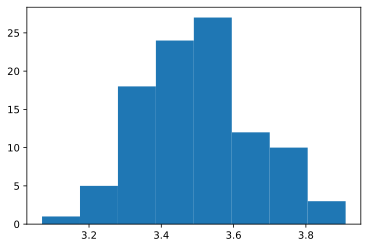

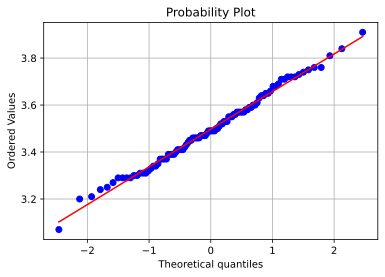

In [50]:
n=100
m=100

rolls=[] #create an empty list of the dice rolls for each experiment
mean=[] #create an empty list for the mean value from each experiment
c=0 #set our iteration counters to 0
i=0
while i<m: #repeat until we reach desired number of experiments
    while c<n: #keep generating a random number until we reach the number of dice we want to roll
        rolls.append(np.random.randint(6)+1) #generate a random number from 1 through 6 and add it to the list
        c=c+1 #integer counter to stop dice rolling loop
    mean.append(sum(rolls)/n) #calculate the mean by dividing each roll from an experiment by the number of 
                                #dice and add it to the list 
    c=0 #reset our dice rolling counter so the inner loop repeats
    rolls=[] #empty our rolls list after finding our mean so it can be filled again
    i=i+1 #integer counter to stop experiment loop 
plt.hist(mean,bins=8) #plot the histogram
plt.show() #show histogram in a separate plot
res=stats.probplot(mean,plot=plt) #use scipy's stats package to create a probability plot of the normal dist
plt.grid() #put a grid on the probability plot
print() #empty print ensures no artist attributes are spat out of cell

The distribution of this experiment is normal; that means that there are no biases in the coding or random number generation. We can tell this is the case by the bell-shaped curve of the histogram but especially from the normal probability plot. The data is clustered closely to the normal distribution line of fit meaning this distribution type models our system well. 

The distribution of rolling a single die would be flat since there should be an equal probability of rolling any number 1 through 6.

### C2)

We now want to see what the effect of varying the number of dice being rolled and the number of times the experiment is repeated.

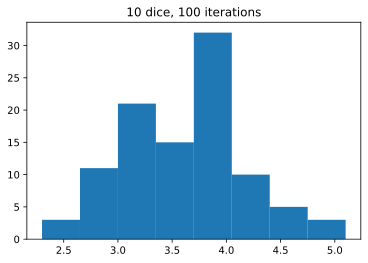

In [74]:
n=10
m=100

rolls=[] 
mean=[]
c=0
i=0
while i<m:
    while c<n:
        rolls.append(np.random.randint(6)+1)
        c=c+1
    mean.append(sum(rolls)/n) 
    c=0
    rolls=[]
    i=i+1
plt.hist(mean,bins=8)
plt.title('10 dice, 100 iterations')
print()

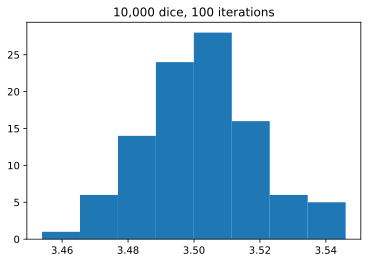

In [73]:
n=10000
m=100

rolls=[] 
mean=[]
c=0
i=0
while i<m:
    while c<n:
        rolls.append(np.random.randint(6)+1)
        c=c+1
    mean.append(sum(rolls)/n) 
    c=0
    rolls=[]
    i=i+1
plt.hist(mean,bins=8)
plt.title('10,000 dice, 100 iterations')
print()

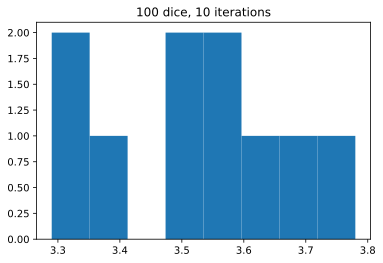

In [75]:
n=100
m=10

rolls=[] 
mean=[]
c=0
i=0
while i<m:
    while c<n:
        rolls.append(np.random.randint(6)+1)
        c=c+1
    mean.append(sum(rolls)/n) 
    c=0
    rolls=[]
    i=i+1
plt.hist(mean,bins=8)
plt.title('100 dice, 10 iterations')
print()

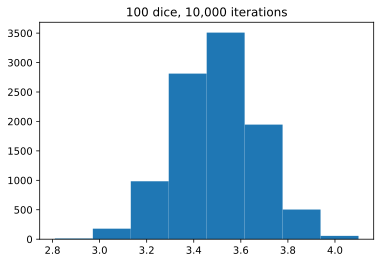

In [77]:
n=100
m=10000

rolls=[] 
mean=[]
c=0
i=0
while i<m:
    while c<n:
        rolls.append(np.random.randint(6)+1)
        c=c+1
    mean.append(sum(rolls)/n) 
    c=0
    rolls=[]
    i=i+1
plt.hist(mean,bins=8)
plt.title('100 dice, 10,000 iterations')
print()

Increasing the number of dice being rolled makes the data more uniformly normal which I expected, but it also more tightly clusters around the mean which I found to be interesting. Increasing the number of experiments gives a pointier distribution which means that it is also more clustered around the mean. Using low numbers of experiments gives erratic data since there arent enough trials yet to begin to reveal the underlying distribution.